## Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE 

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

## Load dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##**DATA UNDERSTANDING**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df = df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['TotalCharges'].dtype

dtype('O')

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

In [10]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
#drop Totalcharges null Value
df.drop(df[df['TotalCharges'].isnull()].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.shape

(7032, 20)

*EDA*

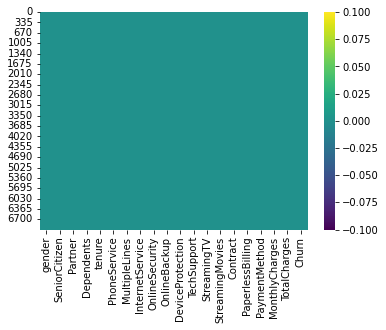

In [13]:
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

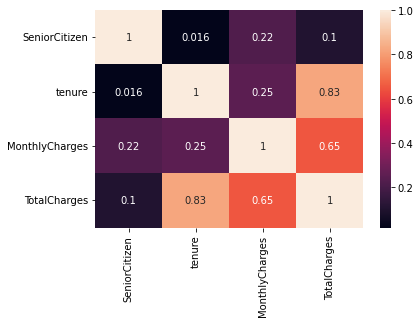

In [14]:
sns.heatmap(df.corr(), annot=True)

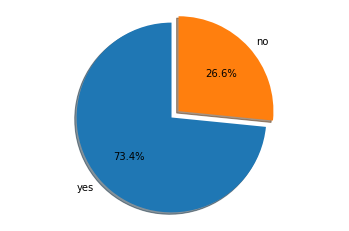

In [15]:
churn=df['Churn'].value_counts()
explode = (0, 0.1)
labels = 'yes', 'no'
fig1, ax1 = plt.subplots()
ax1.pie(churn, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

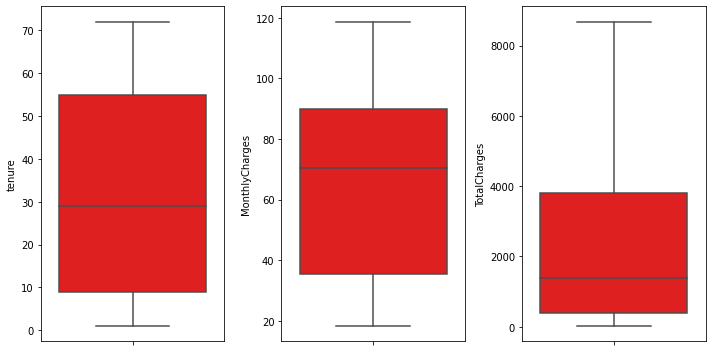

In [16]:
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

features = numerical

plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i + 1)
  sns.boxplot(y=df[features[i]], color='red')
  plt.tight_layout()

**TIDAK TERDAPAT DATA OUTLIER**

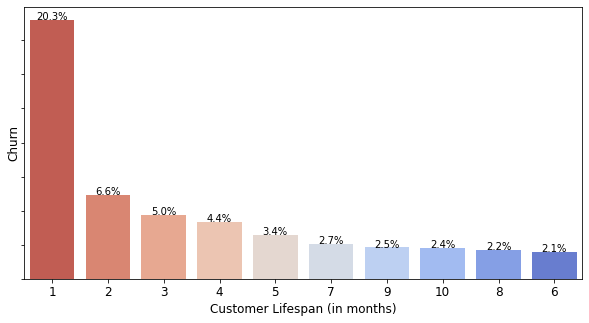

In [17]:
def display_percent(plot, feature, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 10, ha="center")
    plt.show()

p = sns.color_palette("coolwarm", 10)
p.reverse()

df_top_churn = pd.DataFrame(df[df['Churn'] == 'Yes']['tenure'].value_counts().sort_values(ascending=False))
total_churn = df[df['Churn'] == 'Yes'].shape[0]

fig, ax = plt.subplots(figsize=(10,5))
sns_lifespan = sns.barplot( x = df_top_churn[:10].index, y = df_top_churn[:10].tenure, ax=ax, palette=p, order=df_top_churn[:10].index)
plt.xticks(size=12)
plt.xlabel('Customer Lifespan (in months)', size=12)
plt.yticks(size=12)
plt.ylabel('Churn', size=12)
plt.tick_params(labelleft=False)

display_percent(ax, df_top_churn, total_churn)

1. Sebagian besar churn pada bulan pertama berlangganan, dengan total 20,3% pelanggan keluar pada bulan pertama.

2. Sebagian besar pelanggan keluar pada 3 bulan pertama, dengan total 31,9% dari total churn bulan 1 + 2 + 3

## Data Preprocessing

**Handling data Categorycal**

In [18]:
print (df['Partner'].value_counts(ascending=True))

Yes    3393
No     3639
Name: Partner, dtype: int64


In [19]:
for i in df.columns:
  if df[i].dtypes=='object':
    print(f'{i}: {df[i].unique()}')
    print('=====================================================================')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [20]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [21]:
df['gender'].replace({'Female':1, 'Male':0,}, inplace=True)

## Metode one-hot-encoding pada data kategori dengan tipe data object

In [22]:
for i in df.columns:
  if (len(df[i].unique()) > 2) & (df[i].dtypes != 'int64') & (df[i].dtypes != 'float64'):
    print(i)

InternetService
Contract
PaymentMethod


In [23]:
one_hot = ['InternetService' ,'Contract' ,'PaymentMethod']
df = pd.get_dummies(data=df, columns= one_hot)
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                     object
Dependents                                  object
tenure                                       int64
PhoneService                                object
MultipleLines                               object
OnlineSecurity                              object
OnlineBackup                                object
DeviceProtection                            object
TechSupport                                 object
StreamingTV                                 object
StreamingMovies                             object
PaperlessBilling                            object
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [24]:
for i in df.columns:
  if df[i].dtypes=='object':
    print(f'{i}: {df[i].unique()}')
    print('=====================================================================')

Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
PaperlessBilling: ['Yes' 'No']
Churn: ['No' 'Yes']


In [25]:
for i in df.columns:
    if (df[i].dtypes == "object"):
        print(i)

Partner
Dependents
PhoneService
MultipleLines
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
Churn


In [26]:
category = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for i in category:
    df[i].replace({"No":0, "Yes":1}, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


## Min-max scala dengan rasio 0 - 1

In [27]:
scaler = MinMaxScaler()
large_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[large_cols] = scaler.fit_transform(df[large_cols])
df[large_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [29]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,0.442560,0.903299,0.421928,0.286547,0.344852,0.343857,...,0.343572,0.440273,0.216155,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,0.345708,0.295571,0.493902,0.452180,0.475354,0.475028,...,0.474934,0.496455,0.411650,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.394366,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.760563,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
X = df.drop('Churn', axis=1)
y = df['Churn']

[5163 1869]


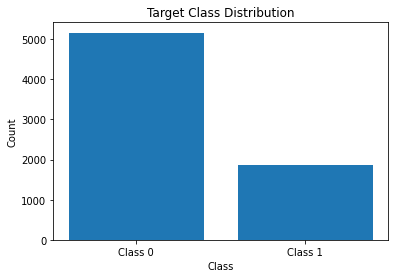

In [31]:
counts = np.bincount(y)
print(counts)
# Plot the class distribution
plt.bar(np.arange(len(counts)), counts, align='center')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Target Class Distribution')
plt.show()

In [32]:
X.shape, y.shape

((7032, 26), (7032,))

In [33]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

[3614 1308]
[1549  561]


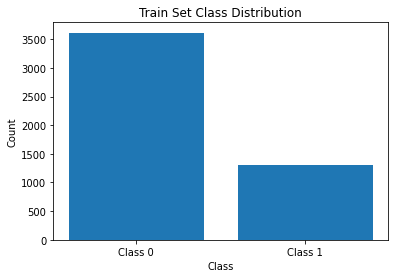

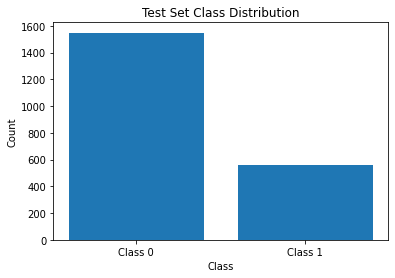

In [34]:
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)
print(train_counts)
print(test_counts)

plt.bar(np.arange(len(train_counts)), train_counts, align='center')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Train Set Class Distribution')
plt.show()

plt.bar(np.arange(len(test_counts)), test_counts, align='center')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Test Set Class Distribution')
plt.show()


**BARCHART MENUNJUKAN DATA IMBABALANCE**

##**METODE OVERSAMPLING DENGAN TEKNIK SMOTE**

In [35]:
oversample = SMOTE()
X1, y1 = oversample.fit_resample(X,y)
X1.shape, y1.shape

((10326, 26), (10326,))

[5163 5163]


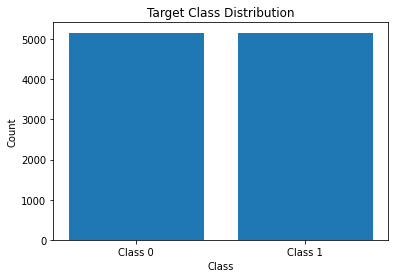

In [36]:
y1_count = np.bincount(y1)
print(y1_count)
# Plot the class distribution
plt.bar(np.arange(len(y1_count)), y1_count, align='center')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Target Class Distribution')
plt.show()

In [37]:
X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size=0.30, random_state=42)

[3600 3628]
[1563 1535]


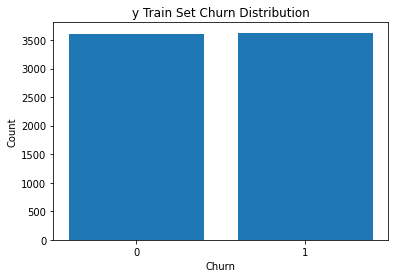

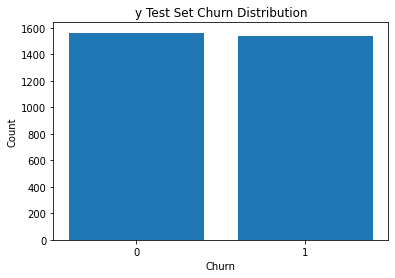

In [38]:
train_counts = np.bincount(y1_train)
test_counts = np.bincount(y1_test)
print(train_counts)
print(test_counts)

plt.bar(np.arange(len(train_counts)), train_counts, align='center')
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('y Train Set Churn Distribution')
plt.show()

plt.bar(np.arange(len(test_counts)), test_counts, align='center')
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('y Test Set Churn Distribution')
plt.show()


## Modeling (Gunakan lebih min 2 model dan bandingkan hasil evaluasinya)

Bebas menggunakan model, mau menggunakan decision tree, random forest, xgboost, dll juga boleh<br><br>
silahkan berekspresi :)

**MODEL KNEIGHBOURS**

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
#MODEL DIBANGUN DENGAN DATASET IMBALANCE

model_knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7]}


grid_search = GridSearchCV(model_knn, param_grid, cv=5)


grid_search.fit(X, y)


print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}%".format(grid_search.best_score_ * 100))

Best parameters: {'n_neighbors': 7}
Best score: 76.89%


In [41]:
pred_knn = grid_search.predict(X_test)

In [42]:
knn = round(accuracy_score(y_test, pred_knn)*100, 2)
print("Acuracy: {:.2f}%".format(knn))

Acuracy: 81.90%


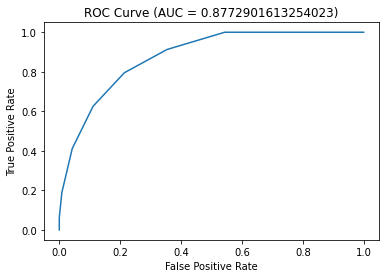

In [43]:
y_pred_proba = grid_search.predict_proba(X_test)[:,1]
# Hitung AUC dari ROC
auc = roc_auc_score(y_test, y_pred_proba)

# Hitung koordinat ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {})'.format(auc))
plt.show()

In [44]:
# MODEL DIBANGUN SETELAH OVERSAMPLE TEKNIK SMOTE
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}


tuning_knn = GridSearchCV(model_knn, param_grid, cv=5)


tuning_knn.fit(X1, y1)


print("Best parameters: {}".format(tuning_knn.best_params_))
print("Best score: {:.2f}%".format(tuning_knn.best_score_ * 100))

Best parameters: {'n_neighbors': 3}
Best score: 80.77%


In [45]:
pred_knn = tuning_knn.predict(X1_test)

In [46]:
knn_smt = round(accuracy_score(y1_test, pred_knn)*100, 2)
print("Acuracy: {:.2f}%".format(knn_smt))

Acuracy: 89.09%


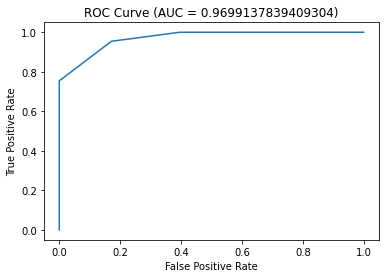

In [47]:
y1_pred_proba = tuning_knn.predict_proba(X1_test)[:,1]

auc = roc_auc_score(y1_test, y1_pred_proba)

fpr, tpr, thresholds = roc_curve(y1_test, y1_pred_proba)


plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {})'.format(auc))
plt.show()

**- Dengan Model KNN dimana Nilai K=3 adalah parameter terbaik**

**MODEL RANDOM FOREST**

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
#MODEL DIBANGUN DENGAN DATASET IMBALANCE

model_rf = RandomForestClassifier(n_estimators=300, random_state=42)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
rf = round(accuracy_score(y_test, pred_rf)*100, 2)
print(rf)

77.96


In [50]:
# MODEL DIBANGUN SETELAH OVERSAMPLE TEKNIK SMOTE SERTA TEkNIK TRIAL DAN ERROR

results = []


for n_trees in range(100, 600, 100):
    clf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    clf.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    results.append((n_trees, accuracy))

for n_trees, accuracy in results:
    print("Number of trees:", n_trees, "Accuracy:", accuracy)

Number of trees: 100 Accuracy: 0.829567462879277
Number of trees: 200 Accuracy: 0.8302130406714009
Number of trees: 300 Accuracy: 0.8285990961910911
Number of trees: 400 Accuracy: 0.8318269851517108
Number of trees: 500 Accuracy: 0.8321497740477728


In [51]:
best_rf = RandomForestClassifier(n_estimators=500, random_state=42)
best_rf.fit(X1_train, y1_train)
pred_rf = best_rf.predict(X1_test)
rf_smt = round(accuracy_score(y1_test, pred_rf)*100, 2)
print(rf_smt)

83.21


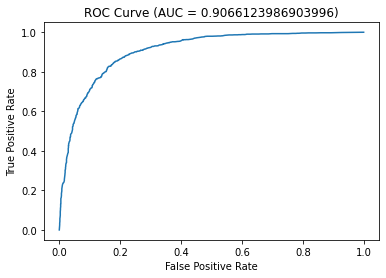

In [52]:
y2_pred_proba = best_rf.predict_proba(X1_test)[:,1]

auc = roc_auc_score(y1_test, y2_pred_proba)

fpr, tpr, thresholds = roc_curve(y1_test, y2_pred_proba)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {})'.format(auc))
plt.show()

**- Dengan model Random Forest dimana jumlah tree 500 adalah parameter terbaik.**

**MODEL XGBOOST CLASSFIER**

In [53]:
from xgboost import XGBClassifier

In [54]:
#MODEL DIBANGUN DENGAN DATASET IMBALANCE

model_xgb = XGBClassifier(max_depth= 8, n_estimators= 100, random_state= 42,  learning_rate= 0.03, n_jobs=5)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)
xgb = round(accuracy_score(y_test, pred_xgb)*100, 2)
print(xgb)

79.15


In [55]:
# MODEL DIBANGUN SETELAH OVERSAMPLE TEKNIK SMOTE

xgb_smt = XGBClassifier(max_depth= 8, n_estimators= 100, random_state= 42,  learning_rate= 0.03, n_jobs=5)
xgb_smt.fit(X1_train, y1_train)
pred_xgb = xgb_smt.predict(X1_test)
xgb_smt = round(accuracy_score(y1_test, pred_xgb)*100, 2)
print(xgb_smt)

81.05


## Evaluation

pilih model yang terbaik performannya kemudian beri pejelasan kenapa model tersebut lebih baik dibandingkan dengan yang lain

**KNN METRIC EVALUATION**

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

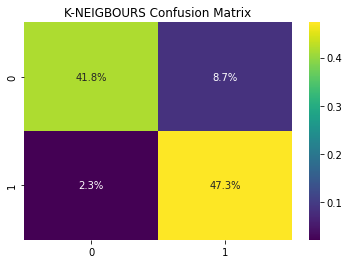

In [57]:
cm1 = confusion_matrix(y1_test, pred_knn)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.1%', cmap="viridis")
plt.title("K-NEIGBOURS Confusion Matrix",fontsize=12)
plt.show()

In [58]:
print(classification_report(y1_test,pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88      1563
           1       0.85      0.95      0.90      1535

    accuracy                           0.89      3098
   macro avg       0.90      0.89      0.89      3098
weighted avg       0.90      0.89      0.89      3098



**RANDOM FOREST METRIC EVALUATION**

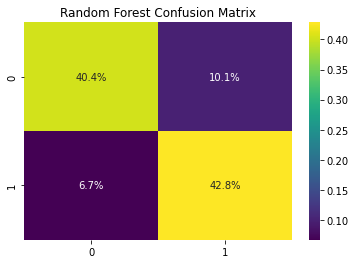

In [59]:
cm2 = confusion_matrix(y1_test, pred_rf)
sns.heatmap(cm2/np.sum(cm2), annot=True, fmt='0.1%', cmap="viridis")
plt.title("Random Forest Confusion Matrix",fontsize=12)
plt.show()

In [60]:
print(classification_report(y1_test,pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1563
           1       0.81      0.86      0.84      1535

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098



**XGBOOST METRIC EVALUATION**

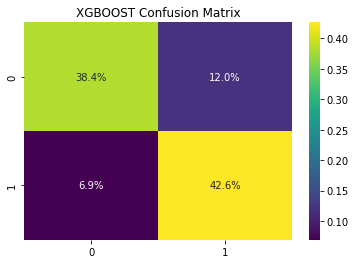

In [61]:
cm3 = confusion_matrix(y1_test, pred_xgb)
sns.heatmap(cm3/np.sum(cm3), annot=True, fmt='0.1%', cmap="viridis")
plt.title("XGBOOST Confusion Matrix",fontsize=12)
plt.show()

In [62]:
print(classification_report(y1_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1563
           1       0.78      0.86      0.82      1535

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098



,Model,Accuracy_score
5,KNeighbours 'SMOTE',89.09
3,Random Forest 'SMOTE',83.21
2,KNeighbours,81.90
4,XGBoost 'SMOTE',81.05
1,XGBoost,79.15
0,Random Forest,77.96


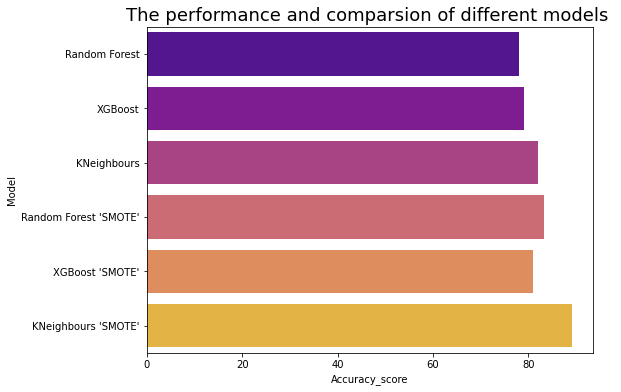

In [63]:
models = pd.DataFrame({
    'Model':['Random Forest', 'XGBoost', 'KNeighbours', 'Random Forest \'SMOTE\'', 'XGBoost \'SMOTE\'', 'KNeighbours \'SMOTE\''],
    'Accuracy_score' :[rf, xgb, knn, rf_smt, xgb_smt, knn_smt]
})
models

plt.figure(figsize=(8,6))
ax = sns.barplot(x='Accuracy_score', y='Model', data=models, palette='plasma')
plt.title("The performance and comparsion of different models ",fontsize=18)
models.sort_values(by='Accuracy_score', ascending=False)

**KESIMPULAN :**

1. Disetiap model yang dibangun dengan data imbalance lebih buruk dalam memprediksi kelas positif dan negatif itu dapat dilihat dari hasil pengukuran AUC-ROC curve
2. Setelah dilakukan oversample dengan SMOTE semua model mampu dengan baik membadakan kelas positif dan negatif
3. Dari Point 2 diatas menunjukan Setiap model Not robust terhadap data imbalance 
4. Dari semua model yang dibangun setelah oversample model KNeghbours mampu lebih baik dari segi performance ini di tunjukan dari perhitungan Acuraccy pada plot terakhir.
5. kenapa KNN+SMOTE lebih baik : Karena KNN bergantung pada kedekatan sampel dengan k tetangga terdekatnya, KNN bisa efektif dalam kumpulan data dengan batas yang jelas antar kelas. sementara Rondom Forest dan XGBoost lebih efektif untuk menangani data dengan high dimensional, berdasarkan sumber yang ada, data dapat dikatakan high dimensi jika memiliki 100-1000 kolom.